In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd

In [20]:
df  = pd.read_csv('Mall_Customers.csv')

**CustomerID:** Unique ID assigned to the customer

**Gender:** Gender of the customer

**Age:** Age of the customer

**Annual Income (k$):** Annual Income of the customer

**Spending Score (1-100):** Score assigned by the mall based on customer behavior and spending nature.

In [21]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
#checking number of nulls (missing values)
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
df.shape

(200, 5)

In [26]:
# using only Age and income variable for easy visualisation
# X = df.iloc[:, [2, 3]].values
X = df.iloc[:, [2, 3]].values

In [27]:
df.iloc[:, [2, 3]].head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [28]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    #init="k-means++": selects initial cluster centroids using sampling based on an empirical probability distribution of the points
    #centroids are selected where there are more points
    #One can use "random" initialization as well
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

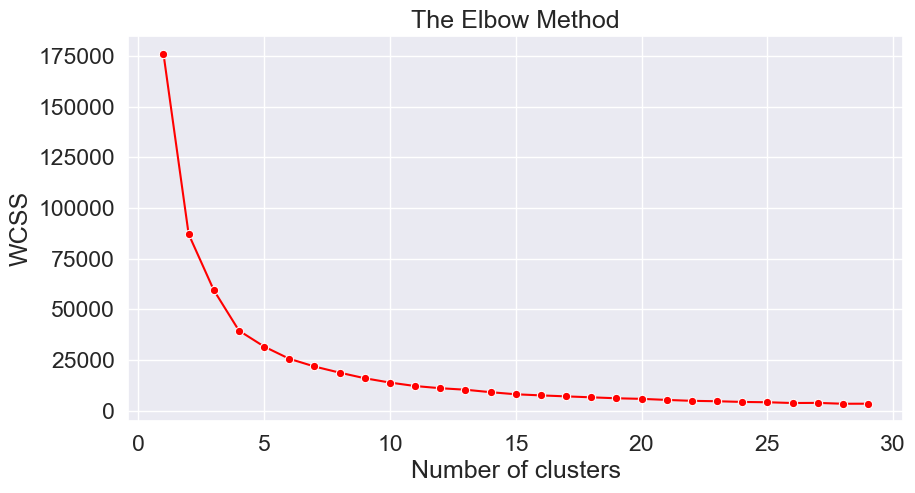

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 30), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# using only Age and income variable for easy visualisation
min_scal = MinMaxScaler()
X_scaled = min_scal.fit_transform(X)
X_scaled2 = pd.DataFrame(X_scaled, columns=['Age','Annual Income (k$)'])

# Fitting K-Means to the dataset
kmeans_scaled = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

#init: Number of time the k-means algorithm will be run with different centroid seeds.
#The final results will be the best output of n_init consecutive runs in terms of inertia
#kmeans_scaled = KMeans(n_clusters = 5, init = 'random', random_state = 1000, n_init=1)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)

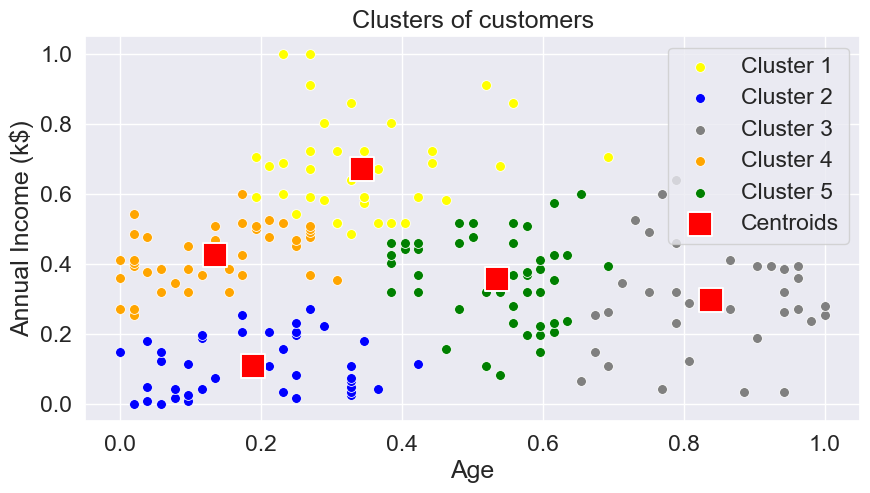

In [14]:
# Visualising the clusters
# Scaling of variables doesn't change the clustering but just the visualization
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 0, 0], y=X_scaled[y_kmeans_scaled == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 1, 0], y=X_scaled[y_kmeans_scaled == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 2, 0], y=X_scaled[y_kmeans_scaled == 2, 1], color = 'grey', label = 'Cluster 3',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 3, 0], y=X_scaled[y_kmeans_scaled == 3, 1], color = 'orange', label = 'Cluster 4',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 4, 0], y=X_scaled[y_kmeans_scaled == 4, 1], color = 'green', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans_scaled.cluster_centers_[:, 0], y=kmeans_scaled.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')
plt.grid(True)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [32]:
labels_scaled = kmeans_scaled.labels_ # for each data point the assigned cluster (cluster number varies from 0 to 4)
centroids_scaled = kmeans_scaled.cluster_centers_ #Position of each centroid

In [33]:
labels_scaled

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       4, 1, 2, 1, 4, 1, 1, 1, 2, 1, 2, 1, 4, 1, 4, 1, 1, 1, 2, 1, 4, 1,
       4, 1, 4, 1, 1, 1, 4, 1, 1, 2, 4, 4, 4, 2, 1, 2, 2, 3, 2, 2, 2, 3,
       4, 2, 3, 1, 2, 4, 2, 2, 2, 3, 4, 4, 3, 4, 2, 4, 2, 4, 3, 4, 2, 3,
       3, 4, 2, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 2, 3, 4, 3, 2, 4, 2, 2,
       2, 3, 4, 3, 3, 3, 2, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4,
       3, 3, 3, 3, 4, 3, 3, 0, 2, 3, 3, 3, 3, 3, 4, 3, 0, 0, 4, 0, 4, 0,
       4, 3, 0, 3, 0, 3, 2, 3, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [34]:
centroids_scaled

array([[0.34319527, 0.67087011],
       [0.18885602, 0.10844893],
       [0.83846154, 0.29648712],
       [0.13414634, 0.42602959],
       [0.534699  , 0.35762651]])